### Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. It uses a logistic function (sigmoid function) to model the probability of the default class, mapping outputs between 0 and 1.

**Equation:**

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n)}}
$$

where:

* `P(y=1|x)` is the probability of the class being 1 given the input features `x`.
* `\beta_0, \beta_1, ..., \beta_n` are the model coefficients.
* `x_1, x_2, ..., x_n` are the input features.

##### Sample Data Using NumPy for Logistic Regression
Below is a sample code to create a synthetic dataset using NumPy that can be fitted to logistic regression and its corresponding plot:

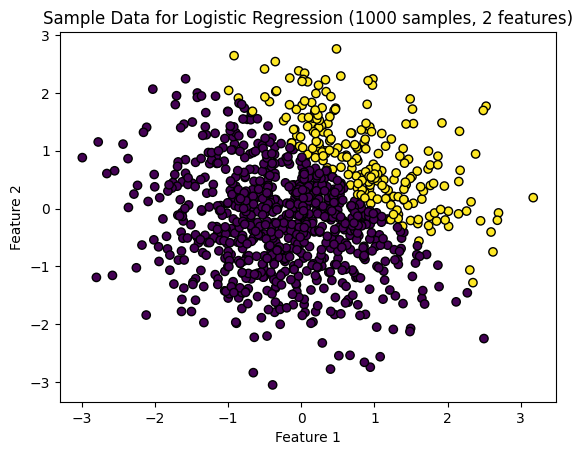

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data based on user input
def generate_synthetic_data(num_samples, num_features):
    np.random.seed(0)
    # Generate features for each sample
    X = np.random.normal(0, 1, (num_samples, num_features))
    
    # Create labels based on the sum of features (arbitrary condition for classification)
    # You can change the condition based on the problem you're modeling
    y = (np.sum(X, axis=1) > num_features / 2).astype(int)
    
    return X, y

# Ask user for number of samples and features
num_samples = 1000
num_features = 2

# Generate synthetic data
X, y = generate_synthetic_data(num_samples, num_features)

# If the number of features is 2, we can plot the data (for visualization purposes)
if num_features == 2:
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Sample Data for Logistic Regression ({num_samples} samples, {num_features} features)')
    plt.show()
else:
    print(f"Generated {num_samples} samples with {num_features} features.")
    
# Stack the features (in case you'd like to process them later)
X_stacked = np.column_stack(X)


Here, we generate two features, X1 and X2, and create a binary target y based on a condition.



#### Logistic Regression from Scratch (using NumPy)

In [4]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Logistic Regression function
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0
    
    # Gradient descent
    for i in range(num_iterations):
        # Linear model
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        
        # Compute gradients
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute loss for monitoring
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Iteration {i}, Loss: {loss:.4f}")
    
    return weights, bias

# Train the model
weights, bias = logistic_regression(X, y)


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.5637
Iteration 200, Loss: 0.4820
Iteration 300, Loss: 0.4271
Iteration 400, Loss: 0.3878
Iteration 500, Loss: 0.3582
Iteration 600, Loss: 0.3351
Iteration 700, Loss: 0.3163
Iteration 800, Loss: 0.3008
Iteration 900, Loss: 0.2876


This implementation uses gradient descent to update the weights and bias over multiple iterations to minimize the binary cross-entropy loss.

### Regularization in Logistic Regression

**Regularization** is a technique used to prevent overfitting in machine learning models by penalizing large weights. In logistic regression, two common types of regularization are:

* **L1 regularization (Lasso):** Adds a penalty proportional to the absolute value of the weights.
* **L2 regularization (Ridge):** Adds a penalty proportional to the square of the weights.

**Mathematical Formulation:**

For L2 regularization, the loss function is modified as:

$$
L(w) = -\frac{1}{N} \sum (y \log(\hat{y}) + (1 - y)\log(1 - \hat{y})) + \lambda \sum w^2
$$

where:

* `L(w)` is the loss function.
* `N` is the number of data points.
* `y` is the true label.
* `\hat{y}` is the predicted probability.
* `w` is the vector of weights.
* `λ` is the regularization parameter.

**Applying Regularization in Code:**

To apply regularization in your logistic regression implementation, you can modify the gradient descent update rule to include the regularization term. For example, using L2 regularization:

```python
# ... (existing code)

for epoch in range(num_epochs):
    # ... (calculate gradients, update weights)
    weights -= learning_rate * (dw + lambda_param * weights)

#### Correlation and Logistic Regression:

Yes, correlation between features matters in logistic regression. High correlation (multicollinearity) can lead to unstable estimates of the coefficients, making the model less interpretable. Techniques like principal component analysis (PCA) or removing redundant features can help address multicollinearity.

#### When to Use and When Not to Use Logistic Regression:

##### Use Logistic Regression:

- Binary classification problems (e.g., spam detection, customer churn)
- When the relationship between the independent variables and the dependent variable is linear
- When the data is not too large or complex
- When interpretability of model coefficients is important

##### Avoid Logistic Regression:

- Multiclass classification (consider softmax regression)
- Non-linear relationships (explore techniques like feature engineering or non-linear models)
- High-dimensional data with many features compared to the number of samples (consider dimensionality reduction or other models)
- If your dataset has a significant class imbalance (e.g., many more samples in one class than the other), logistic regression might struggle to learn the decision boundary effectively. Techniques like oversampling, undersampling, or class weighting can help address this issue.
- Outliers can have a disproportionate impact on logistic regression models. If your data contains outliers, consider techniques like outlier detection and removal or robust regression methods.

#### Assessing Linearity in Logistic Regression
Logistic regression assumes a linear relationship between the independent variables and the logit (log-odds) of the dependent variable, not the raw dependent variable itself (since logistic regression models a binary outcome, not a continuous one). Here are several methods to check this linearity assumption:

1. Box-Tidwell Test:

This test assesses linearity between continuous predictors and the logit of the outcome.
It involves adding interaction terms between continuous predictors and their natural logarithms.
Significant interaction terms indicate non-linearity and violate the assumption.
How to do it:

Create interaction variables: Multiply each continuous predictor with its log-transformed value.
Fit a logistic regression model with the interaction terms.
Check if the interaction terms are statistically significant.

2. Residual Plots:

Residual plots help visualize the relationship between residuals (differences between observed and predicted values) and independent variables.
In logistic regression, use deviance or Pearson residuals.
Randomly scattered residuals around zero suggest linearity. Systematic patterns indicate non-linearity.
How to do it:

Plot residuals against each independent variable.
Look for randomness in the residual distribution.

3. Logit vs. Continuous Predictors Plot:

Visually check linearity by plotting the logit (log-odds) of the dependent variable against continuous independent variables.
A roughly straight line indicates a linear relationship in the logit scale.
How to do it:

Fit a logistic regression model.
Compute the predicted logit.
Plot the logit against each independent variable.
Look for a clear linear relationship.

```python
# Logistic regression model fit
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predicted log-odds (logit)
logit = log_reg.intercept_ + np.dot(X, log_reg.coef_.T)

# Plot the logit against one of the features
plt.scatter(X[:, 0], logit)
plt.xlabel("Feature X1")
plt.ylabel("Logit")
plt.title("Logit vs. Feature X1")
plt.show()
```

4. Generalized Additive Models (GAMs):

GAMs relax the linearity assumption by allowing for smoother curves between predictors and the logit.
If the smoothed relationship is close to linear, the logistic regression model might be appropriate.
How to do it:

Use libraries like pyGAM to fit a GAM and visualize the relationships.

5. Binned Residual Plots:

Compare predicted probabilities with observed outcomes.
Evenly distributed residuals across the range of predicted probabilities indicate linearity.
How to do it:

Group data based on predicted probabilities.
Plot residuals for each bin.
Look for large deviations from zero.

6. Polynomial or Interaction Terms:

Include polynomial terms (e.g., X^2) or interaction terms in the model if non-linearity is suspected.
Significant terms indicate non-linear relationships.
How to do it:

Add squared or interaction terms manually.
Check their significance in the model.

7. Hosmer-Lemeshow Goodness-of-Fit Test:

Checks if observed and predicted event rates match in subgroups.
While for overall fit, a significant result could indicate a problem with the model, including its linearity assumption.
How to do it:

Use libraries like statsmodels to perform the Hosmer-Lemeshow test.